In [2]:
import matplotlib.pyplot as plt

In [4]:
def gorizont_coord(file):
    with open(file, 'r') as f:
        gorizon = []
        for line in f:
            if not line.startswith('#'):  # Пропуск строк, начинающихся с #
                x, y, z, *rest = line.split()  # Разбиение строки по столбцам
                x = int(x.split('.')[0])  # Получение целочисленного значения из первого столбца
                y = int(y.split('.')[0])  # Получение целочисленного значения из второго столбца
                z = int(z.split('.')[0])  # Получение целочисленного значения из третьего столбца
                gorizon.append([x, y, z])  # Добавление данных в словарь

    return gorizon

In [5]:
Top_TWT = gorizont_coord('C:/HV/Seismic/datas/TWT_Top_U1.txt')
Bottom_TWT = gorizont_coord('C:/HV/Seismic/datas/TWT_Bottom_U1.txt')
Top_TVDSS = gorizont_coord('C:/HV/Seismic/datas/TVDSS_Top_U1.txt')
Bottom_TVDSS = gorizont_coord('C:/HV/Seismic/datas/TVDSS_Bottom_U1.txt')

In [29]:
def proverka_v(twt, tvdss):
    v = []
    map = []
    for i in range(len(twt)):
        c = 2000 * (tvdss[i][2]/twt[i][2])
        map.append([tvdss[i][0], tvdss[i][1], c])
        if (500>c) or (c>10000):
            v.append([twt[i][0], twt[i][1]])
    return v, map

In [30]:
v_top, map_top = proverka_v(Top_TWT, Top_TVDSS)

In [34]:
if len(v_top) == 0:
    print('тест пройден успешно')
else:
    print('Убедитесь, что ваша структурная карта и карта изохрон соответствуют друг другу. Значения скоростей аномальные')

тест пройден успешно


In [32]:
def show_map (map, f):
    values = [point[2] for point in map]
    points = [[point[1], point[0]] for point in map]
    # Создание графика
    plt.figure(figsize=(6, 6))
    #scatter = plt.scatter(x=x, y=y, c=values)
    scatter = plt.scatter(x=list(zip(*points))[0], y=list(zip(*points))[1], c=values)
    if f == 0:
        plt.title('Карта скоростей кровли')
    else:
        plt.title('Карта скоростей подошвы')
    
    plt.ylabel('Инлайны')
    plt.xlabel('Кросслайны')
    plt.colorbar(scatter, label='Шкала значений сскоростей')
    plt.grid(False)  # Отключение сетки
    plt.show()

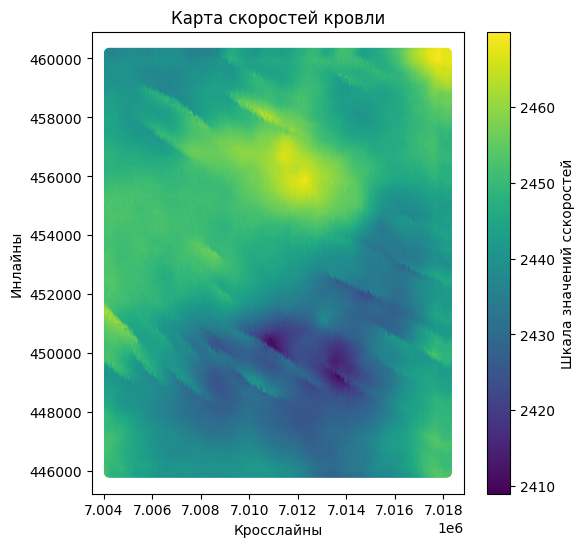

In [33]:
show_map(map_top, 0)

In [21]:
v_bottom, map_bottom = proverka_v(Bottom_TWT, Bottom_TVDSS)

In [35]:
if len(v_bottom) == 0:
    print('тест пройден успешно')
else:
    print('Убедитесь, что ваша структурная карта и карта изохрон соответствуют друг другу. Значения скоростей аномальные')

тест пройден успешно


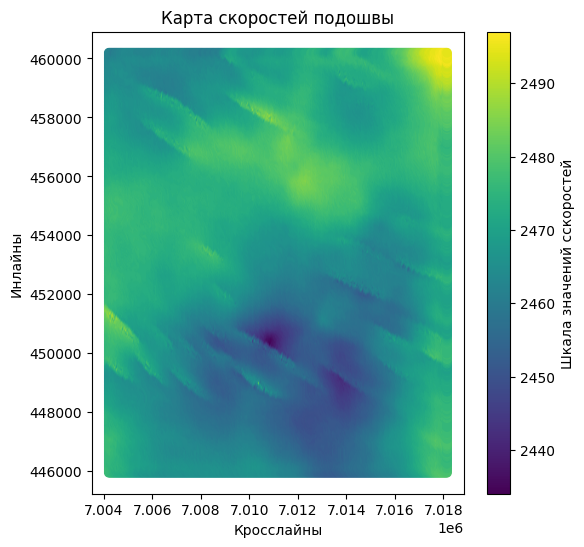

In [23]:
show_map(map_bottom, 1)